In [1]:
import yfinance as yf
import talib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
%matplotlib inline

ticker= "2454.TW"
stock_data = yf.download(ticker, start="2015-01-04", end="2021-12-15")

[*********************100%***********************]  1 of 1 completed


In [2]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,460.0,467.0,460.0,462.0,357.540588,2459000
2015-01-06,460.0,462.0,458.0,458.0,354.445007,5915000
2015-01-07,468.0,487.0,466.5,486.5,376.501068,13046000
2015-01-08,492.5,494.5,484.5,485.0,375.340210,8367000
2015-01-09,492.0,495.0,488.0,488.0,377.661926,7473000
...,...,...,...,...,...,...
2021-12-08,1085.0,1110.0,1080.0,1095.0,1095.000000,7323171
2021-12-09,1095.0,1100.0,1075.0,1085.0,1085.000000,2463930
2021-12-10,1075.0,1085.0,1065.0,1075.0,1075.000000,2943248


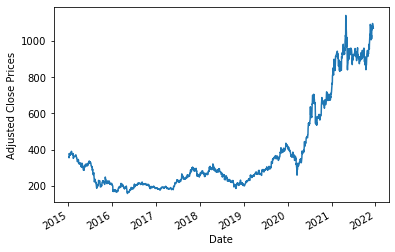

In [3]:
stock_data['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

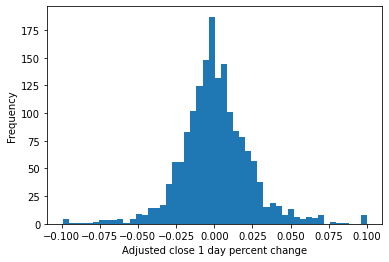

In [4]:
stock_data['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel("Adjusted close 1 day percent change")
plt.show()

In [5]:
feature_names = []
for n in [14, 30, 50, 200]:
    stock_data['ma'  + str(n)] = talib.SMA(stock_data['Adj Close'].values, timeperiod = n)
    stock_data['rsi' + str(n)] = talib.RSI(stock_data['Adj Close'].values, timeperiod = n)
    
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

In [6]:
stock_data['Volume_1d_change'] = stock_data['Volume'].pct_change()

In [7]:
stock_data['5d_future_close'] = stock_data['Adj Close'].shift(-5)
stock_data['5d_close_future_pct'] = stock_data['5d_future_close'].pct_change(5)

In [21]:
feature_names

['ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']

In [20]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Volume_1d_change,5d_future_close,5d_close_future_pct
Date,,,,,,,,,,,,,,,,,
2015-10-29,259.0,259.0,252.5,253.0,207.533081,6685000,220.335440,41.813898,214.136404,43.206475,211.396641,42.420832,294.005921,42.085913,-0.592998,243.625778,0.173913
2015-10-30,252.0,258.5,249.5,254.5,208.763504,7042000,219.632335,43.122727,213.548531,43.726273,211.290003,42.722177,293.277514,42.161382,0.053403,236.243210,0.131631
2015-11-02,259.5,271.0,259.5,270.0,221.477982,18087000,219.222191,54.509764,213.357130,48.741273,211.454061,45.717714,292.502398,42.933678,1.568446,234.602585,0.059259
2015-11-03,275.0,279.0,273.5,276.0,226.399719,17449000,219.427264,58.013909,213.288772,50.507506,211.814987,46.816366,291.757696,43.228590,-0.035274,234.192459,0.034420
2015-11-04,283.0,303.5,281.0,302.5,248.137344,29579000,220.979951,69.272222,214.355147,57.239445,213.020811,51.262033,291.110073,44.501691,0.695169,225.579437,-0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,1020.0,1070.0,1010.0,1065.0,1065.000000,6353875,1040.571429,62.013665,986.733333,59.637491,950.600000,57.203427,927.925692,54.925720,-0.218757,1095.000000,0.028169
2021-12-02,1045.0,1085.0,1040.0,1080.0,1080.000000,7112276,1047.500000,64.045378,992.300000,60.784230,953.980000,57.966007,928.759339,55.159611,0.119360,1085.000000,0.004630
2021-12-03,1080.0,1090.0,1055.0,1060.0,1060.000000,4662507,1050.000000,59.477533,996.766667,58.492068,956.880000,56.593991,929.512213,54.778710,-0.344442,1075.000000,0.014151


In [9]:
stock_data.dropna(inplace = True)
X = stock_data[feature_names]
Y = stock_data['5d_close_future_pct']
train_size = int(0.90 * Y.shape[0])
X_train = X[:train_size]
y_train = Y[:train_size]
X_test = X[train_size:]
y_test = Y[train_size:]

In [19]:
y_train

Date
2015-10-29    0.173913
2015-10-30    0.131631
2015-11-02    0.059259
2015-11-03    0.034420
2015-11-04   -0.090909
                ...   
2021-04-29   -0.105485
2021-05-03   -0.114027
2021-05-04   -0.160369
2021-05-05   -0.116418
2021-05-06   -0.172512
Name: 5d_close_future_pct, Length: 1340, dtype: float64

In [17]:
y_test

Date
2021-05-07   -0.155660
2021-05-10   -0.066394
2021-05-11    0.091109
2021-05-12    0.061937
2021-05-13    0.065292
                ...   
2021-12-01    0.028169
2021-12-02    0.004630
2021-12-03    0.014151
2021-12-06   -0.009217
2021-12-07    0.004695
Name: 5d_close_future_pct, Length: 149, dtype: float64

In [22]:
rf_model = RandomForestRegressor(n_estimators = 300, max_depth = 3, max_features = 4, random_state = 1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.05115298535214118
Mean Squared Error: 0.004121617548703272
Root Mean Squared Error: 0.06419982514542599


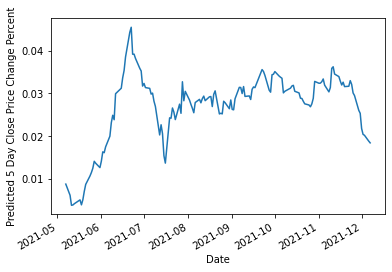

Mean Absolute Error: 0.03543938376846537
Mean Squared Error: 0.002125574345439748
Root Mean Squared Error: 0.046103951516543


In [12]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
plt.ylabel("Predicted 5 Day Close Price Change Percent")
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

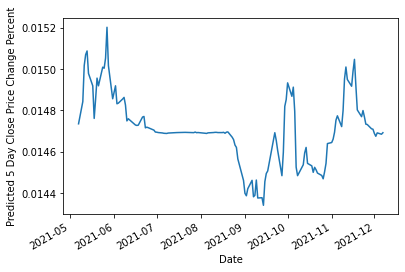

Mean Absolute Error: 0.031696682553545186
Mean Squared Error: 0.0017513086390352134
Root Mean Squared Error: 0.041848639631835265


In [13]:
nn_model = MLPRegressor(random_state=1, max_iter=500, activation = 'logistic', hidden_layer_sizes = (100, 100))
nn_model.fit(X_train, y_train)
y_pred = nn_model.predict(X_test)
y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
plt.ylabel("Predicted 5 Day Close Price Change Percent")
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))